## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import accuracy_score, log_loss

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras
from keras.callbacks import EarlyStopping

## Importing the dataset +preprocessing

In [3]:
data=pd.read_excel("Truss Structure Dataset5.xlsx")
data2=pd.read_excel("Truss_Structure_Dataset6.xlsx")
data3=pd.concat([data,data2])
data3 = data3.sample(frac=1).reset_index(drop=True)

In [4]:
display(data3)

,1,2,3,4,5,6,7,8,9,10,11,Energie
0,0.372625,0.036952,0.871123,0.992046,0.882241,0.109133,0.126586,0.864761,0.253058,0.174005,0.683836,355.043035
1,0.595640,0.396182,0.689143,0.543404,0.180574,0.374775,0.417090,0.249053,0.009036,0.838272,0.588425,55.407610
2,0.299054,0.376484,0.905186,0.862441,0.279375,0.383114,0.034448,0.035374,0.395904,0.090785,0.766442,236.390187
3,0.820312,0.837640,0.731841,0.347903,0.691276,0.813567,0.727008,0.148912,0.127282,0.755156,0.761149,51.053388
4,0.252854,0.655611,0.313543,0.090798,0.379974,0.203655,0.739880,0.458167,0.240166,0.605177,0.484992,90.569532
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.634770,0.981408,0.576253,0.403566,0.424018,0.314936,0.072621,0.774229,0.912882,0.491301,0.150827,142.006148
9996,0.811308,0.666054,0.024444,0.420245,0.800145,0.960749,0.394623,0.147317,0.810068,0.659790,0.907675,108.260974
9997,0.876696,0.656479,0.702434,0.483042,0.589523,0.754776,0.598025,0.067360,0.521554,0.961067,0.556016,113.967657
9998,0.252355,0.122342,0.253858,0.900166,0.758546,0.427914,0.882322,0.541752,0.334695,0.815513,0.443790,162.355535


In [5]:
display(data2)

,1,2,3,4,5,6,7,8,9,10,11,Energie
0,0.619652,0.949874,0.131964,0.398222,0.466600,0.604397,0.248234,0.269262,0.716872,0.446823,0.214655,66.402769
1,0.943509,0.834502,0.286284,0.854523,0.120069,0.484662,0.452882,0.379556,0.379361,0.787707,0.272614,40.924964
2,0.964379,0.812896,0.293532,0.890055,0.660862,0.522787,0.242767,0.390572,0.135387,0.373135,0.741033,52.364517
3,0.502916,0.731680,0.620701,0.595538,0.165060,0.351664,0.949192,0.990115,0.401272,0.716663,0.204312,37.949442
4,0.921520,0.258728,0.863417,0.683134,0.366845,0.888925,0.748769,0.676206,0.516843,0.401286,0.114303,33.944693
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.163833,0.905806,0.203944,0.536531,0.489240,0.488925,0.534295,0.886184,0.005615,0.020470,0.716666,60.958949
4996,0.387603,0.332440,0.223496,0.494618,0.226583,0.529867,0.995902,0.705773,0.390650,0.772161,0.060018,41.624701
4997,0.934251,0.294979,0.196026,0.667316,0.432830,0.196805,0.672474,0.427181,0.980834,0.907335,0.856377,34.653415
4998,0.685295,0.003175,0.770855,0.346905,0.706781,0.495914,0.212698,0.768262,0.320924,0.530659,0.482278,79.145221


In [6]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
data=normalize(data)
data2=normalize(data2)
data3=normalize(data3)

In [7]:
display(data3)
display(data2)

,1,2,3,4,5,6,7,8,9,10,11,Energie
0,0.372611,0.036857,0.871223,0.992234,0.882282,0.108711,0.126490,0.864802,0.253029,0.173970,0.684009,0.036774
1,0.595651,0.396134,0.689197,0.543460,0.180270,0.374548,0.417037,0.249062,0.008837,0.838273,0.588543,0.003305
2,0.299032,0.376434,0.905295,0.862591,0.279119,0.382893,0.034339,0.035372,0.395976,0.090745,0.766663,0.023521
3,0.820349,0.837651,0.731906,0.347901,0.691223,0.813661,0.727002,0.148916,0.127165,0.755153,0.761367,0.002819
4,0.252826,0.655597,0.313502,0.090721,0.379768,0.203303,0.739876,0.458187,0.240128,0.605166,0.485051,0.007233
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.634787,0.981438,0.576278,0.403581,0.423833,0.314665,0.072517,0.774266,0.913315,0.491283,0.150694,0.012978
9996,0.811345,0.666042,0.024329,0.420265,0.800145,0.960950,0.394567,0.147321,0.810429,0.659782,0.907977,0.009209
9997,0.876741,0.656465,0.702491,0.483081,0.589420,0.754827,0.598000,0.067359,0.521714,0.961075,0.556116,0.009846
9998,0.252327,0.122258,0.253801,0.900327,0.758526,0.427726,0.882340,0.541776,0.334724,0.815513,0.443825,0.015251


,1,2,3,4,5,6,7,8,9,10,11,Energie
0,0.619414,0.950804,0.131876,0.398145,0.466482,0.604361,0.248156,0.269235,0.717255,0.446803,0.214437,0.021977
1,0.943523,0.835294,0.286236,0.854948,0.119746,0.484514,0.452835,0.379541,0.379417,0.787706,0.272446,0.008181
2,0.964410,0.813662,0.293485,0.890518,0.660858,0.522674,0.242688,0.390558,0.135208,0.373110,0.741270,0.014375
3,0.502587,0.732350,0.620738,0.595678,0.164764,0.351393,0.949220,0.990163,0.401350,0.716658,0.204085,0.006570
4,0.921517,0.258835,0.863515,0.683370,0.366667,0.889153,0.748767,0.676222,0.517032,0.401263,0.113999,0.004401
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.163241,0.906683,0.203874,0.536606,0.489135,0.488781,0.534260,0.886221,0.005311,0.020426,0.716882,0.019029
4996,0.387185,0.332634,0.223432,0.494647,0.226323,0.529762,0.995937,0.705792,0.390718,0.772159,0.059666,0.008560
4997,0.934258,0.295129,0.195954,0.667535,0.432692,0.196390,0.672460,0.427171,0.981471,0.907340,0.856714,0.004785
4998,0.685108,0.002977,0.770929,0.346772,0.706804,0.495777,0.212615,0.768287,0.320924,0.530643,0.482291,0.028877


In [8]:
data3.isna().sum()

1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
Energie    0
dtype: int64

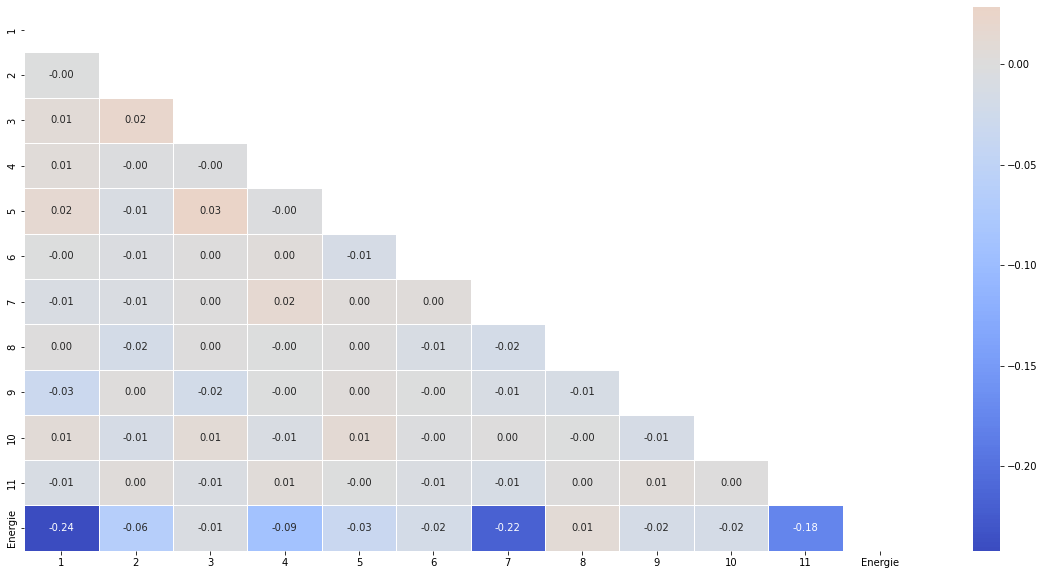

In [9]:
corr = data3.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Draw the heatmap
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, mask=mask,  cmap="coolwarm", center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

## Generating categories based on the strain energy

In [10]:
moyenne=data3['Energie'].mean()
mini=data3['Energie'].min()

In [11]:
moyenne

0.015816284216368014

In [12]:
mini

0.0

In [13]:
y=[]
for x in data3['Energie']:
    if x<=(mini +(moyenne-mini)/2):
        y.append(0)
    elif x>=moyenne:
        y.append(2)
    else:
        y.append(1)

yy=[]
for x in data2['Energie']:
    if x<=(mini +(moyenne-mini)/2):
        yy.append(0)
    elif x>=moyenne:
        yy.append(2)
    else:
        yy.append(1)
print (y[:20])
print (yy[:20])

[2, 0, 2, 0, 0, 1, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 2]
[2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2]


In [14]:
data3['classe']=y


In [15]:
display(data3)


,1,2,3,4,5,6,7,8,9,10,11,Energie,classe
0,0.372611,0.036857,0.871223,0.992234,0.882282,0.108711,0.126490,0.864802,0.253029,0.173970,0.684009,0.036774,2
1,0.595651,0.396134,0.689197,0.543460,0.180270,0.374548,0.417037,0.249062,0.008837,0.838273,0.588543,0.003305,0
2,0.299032,0.376434,0.905295,0.862591,0.279119,0.382893,0.034339,0.035372,0.395976,0.090745,0.766663,0.023521,2
3,0.820349,0.837651,0.731906,0.347901,0.691223,0.813661,0.727002,0.148916,0.127165,0.755153,0.761367,0.002819,0
4,0.252826,0.655597,0.313502,0.090721,0.379768,0.203303,0.739876,0.458187,0.240128,0.605166,0.485051,0.007233,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.634787,0.981438,0.576278,0.403581,0.423833,0.314665,0.072517,0.774266,0.913315,0.491283,0.150694,0.012978,1
9996,0.811345,0.666042,0.024329,0.420265,0.800145,0.960950,0.394567,0.147321,0.810429,0.659782,0.907977,0.009209,1
9997,0.876741,0.656465,0.702491,0.483081,0.589420,0.754827,0.598000,0.067359,0.521714,0.961075,0.556116,0.009846,1
9998,0.252327,0.122258,0.253801,0.900327,0.758526,0.427726,0.882340,0.541776,0.334724,0.815513,0.443825,0.015251,1


In [16]:
classe=data3.classe


Number of inferior:  3924
Number of between :  3329
Number of super :  2747


C:\Users\utilisateur\anaconda3\anaconda\envs\project\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


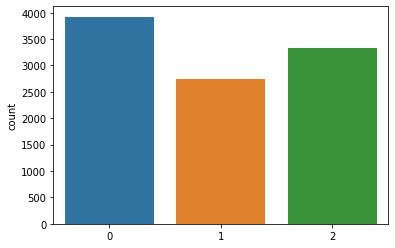

In [17]:
ax = sns.countplot(y,label="Count") 

A, B,C= classe.value_counts()

print('Number of inferior: ',A)
print('Number of between : ',B)
print('Number of super : ',C)


In [18]:
#bx = sns.countplot(yy,label="Count")  

In [19]:
X = data3.drop(['classe'], axis=1)
Y=data3['classe']


In [20]:
X.shape
Y.shape


(10000,)

## Building the model

In [23]:
# Split the data into training and testing sets

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,stratify=y,random_state=123)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)


In [24]:
#  model
model = Sequential()
model.add(Dense(12, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(48, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(96, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', # this is different instead of binary_crossentropy (for regular classification)
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 24)                312       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 48)                1200      
                                                                 
 dropout_1 (Dropout)         (None, 48)                0         
                                                                 
 dense_3 (Dense)             (None, 48)                2352      
                                                                 
 dropout_2 (Dropout)         (None, 48)                0

In [25]:
# early stopping callback
# This callback will stop the training when there is no improvement in  
#the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=40, 
                    batch_size=50,
                    shuffle=True,
                    validation_data=(X_test,y_test),
                    verbose=1)

Epoch 1/40
140/140 [==============================] - 1s 3ms/step - loss: 1.0772 - accuracy: 0.4123 - val_loss: 1.0337 - val_accuracy: 0.4727
Epoch 2/40
140/140 [==============================] - 0s 2ms/step - loss: 1.0301 - accuracy: 0.4661 - val_loss: 0.9950 - val_accuracy: 0.4927
Epoch 3/40
140/140 [==============================] - 0s 1ms/step - loss: 0.9989 - accuracy: 0.4941 - val_loss: 0.9752 - val_accuracy: 0.5123
Epoch 4/40
140/140 [==============================] - 0s 1ms/step - loss: 0.9759 - accuracy: 0.5001 - val_loss: 0.9568 - val_accuracy: 0.5117
Epoch 5/40
140/140 [==============================] - 0s 1ms/step - loss: 0.9600 - accuracy: 0.5110 - val_loss: 0.9381 - val_accuracy: 0.5260
Epoch 6/40
140/140 [==============================] - 0s 1ms/step - loss: 0.9432 - accuracy: 0.5207 - val_loss: 0.9228 - val_accuracy: 0.5343
Epoch 7/40
140/140 [==============================] - 0s 1ms/step - loss: 0.9302 - accuracy: 0.5316 - val_loss: 0.9163 - val_accuracy: 0.5350
Epoch 

## Evaluating the model

In [26]:
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

94/94 [==============================] - 0s 862us/step - loss: 0.1461 - accuracy: 0.9400
Loss of the model is -  0.14611057937145233
94/94 [==============================] - 0s 899us/step - loss: 0.1461 - accuracy: 0.9400
Accuracy of the model is -  93.99999976158142 %


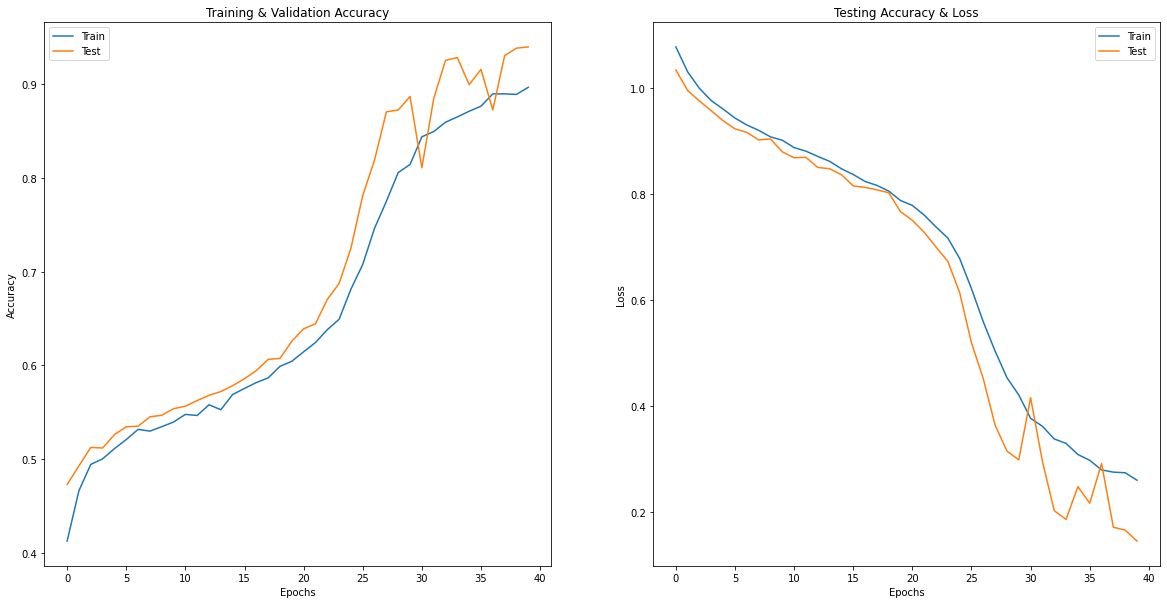

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [27]:
fig , ax = plt.subplots(1,2)

fig.set_size_inches(20,10)

ax[0].plot(history.history['accuracy'] ,  label = 'Training Accuracy')
ax[0].plot(history.history['val_accuracy'] ,  label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend(['Train', 'Test'])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(history.history['loss'] , label = 'Training Loss')
ax[1].plot(history.history['val_loss'] , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend(['Train', 'Test'])
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()
plt.figure()



In [28]:
pred = model.predict(X_test[:])
print(pred)

94/94 [==============================] - 0s 622us/step
[[9.6892708e-37 6.8018195e-12 1.0000000e+00]
 [9.9497128e-01 5.0287144e-03 4.8830713e-09]
 [7.1815471e-04 4.0257683e-01 5.9670502e-01]
 ...
 [4.7716222e-14 1.1359538e-04 9.9988639e-01]
 [9.9654299e-01 3.4570291e-03 2.1770905e-11]
 [5.4842085e-01 4.5157915e-01 3.1420747e-08]]


In [29]:
#print(pred2)

In [30]:
p=np.argmax(pred,axis=1)
print(p[:15])
y_test=np.argmax(y_test, axis=1)
print(y_test[:15])
    

[2 0 2 1 1 2 2 2 1 1 0 1 2 0 2]
[2 0 1 0 1 2 2 2 2 1 0 1 2 0 2]


In [31]:
predictions = p
predictions = predictions.reshape(1,-1)[0]
predictions[:15]


array([2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 2], dtype=int64)

In [32]:
print(classification_report(y_test, predictions, target_names = ['0','1','2']))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1177
           1       0.89      0.89      0.89       824
           2       0.96      0.96      0.96       999

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



In [33]:
#print(classification_report(y2, predictions2, target_names = ['0','1','2']))

In [34]:
cm = confusion_matrix(y_test,predictions)
cm

array([[1127,   50,    0],
       [  47,  737,   40],
       [   0,   43,  956]], dtype=int64)

In [35]:
cm = pd.DataFrame(cm , index = ['0','1','2'] , columns = ['0','1','2'])

<AxesSubplot:>

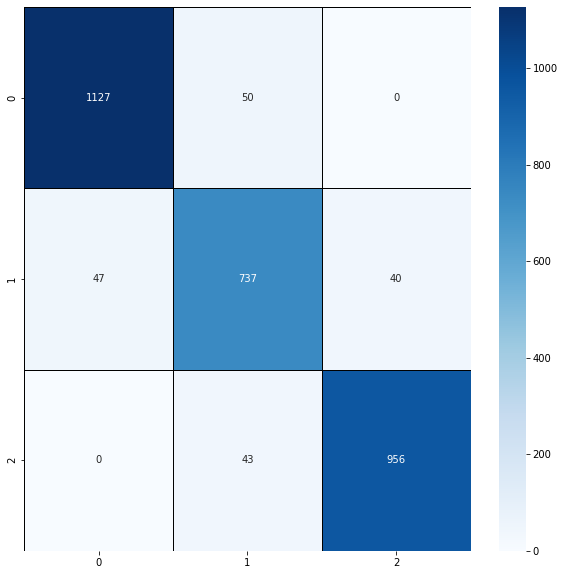

In [36]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')